In [37]:
import pandas as pd
import scipy.stats as stats
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import numpy as np

# Results

## Age Classes

### Unbalanced

In [3]:
data = {'Model': ['CNN', 'SVM', 'CNN', 'SVM', 'SVM', 'CNN', 'CNN', 'SVM', 'SVM', 'CNN'],
        'Feature Extract': ['BASE', 'VGG 16', 'Autoenconder', 'BASE', 'HOG', 'HOG', 'ORB', 'ORB', 'Autoenconder', 'VGG 16'],
        'ACC': [0.66, 0.54, 0.59, 0.7, 0.52, 0.56, 0.37, 0.12, 0.21, 0.27],
        'MCC': [0.51, 0.42, 0.42, 0.41, 0.4, 0.39, 0.09, 0.08, 0.02, 0.01]
       }

age_classes_unbalanced = pd.DataFrame(data).sort_values("MCC", ascending = False)
age_classes_unbalanced

,Model,Feature Extract,ACC,MCC
0,CNN,BASE,0.66,0.51
1,SVM,VGG 16,0.54,0.42
2,CNN,Autoenconder,0.59,0.42
3,SVM,BASE,0.70,0.41
4,SVM,HOG,0.52,0.40
5,CNN,HOG,0.56,0.39
6,CNN,ORB,0.37,0.09
7,SVM,ORB,0.12,0.08
8,SVM,Autoenconder,0.21,0.02
9,CNN,VGG 16,0.27,0.01


### Balanced

In [4]:
data = {'Model': ['CNN', 'SVM', 'SVM', 'SVM', 'SVM', 'CNN', 'CNN', 'SVM', 'CNN', 'CNN'],
        'Feature Extract': ['BASE', 'HOG', 'VGG 16', 'Autoenconder', 'BASE', 'HOG', 'Autoenconder', 'ORB', 'ORB', 'VGG 16'],
        'ACC': [0.60, 0.63, 0.58, 0.56, 0.55, 0.52, 0.52, 0.3, 0.28, 0.19],
        'MCC': [0.51, 0.56, 0.51, 0.47, 0.46, 0.43, 0.41, 0.15, 0.13, 0.02]}

     
age_classes_balanced = pd.DataFrame(data).sort_values("MCC", ascending = False)
age_classes_balanced

,Model,Feature Extract,ACC,MCC
1,SVM,HOG,0.63,0.56
0,CNN,BASE,0.60,0.51
2,SVM,VGG 16,0.58,0.51
3,SVM,Autoenconder,0.56,0.47
4,SVM,BASE,0.55,0.46
5,CNN,HOG,0.52,0.43
6,CNN,Autoenconder,0.52,0.41
7,SVM,ORB,0.30,0.15
8,CNN,ORB,0.28,0.13
9,CNN,VGG 16,0.19,0.02


## Genders

### Unbalanced

In [5]:
data = {'Model': ['SVM', 'CNN', 'SVM', 'CNN', 'SVM', 'SVM', 'CNN', 'CNN', 'CNN', 'SVM'],
        'Feature Extract': ['VGG 16', 'BASE', 'HOG', 'VGG 16', 'BASE', 'Autoenconder', 'Autoenconder', 'HOG', 'ORB', 'ORB'],
        'ACC': [0.89, 0.89, 0.88, 0.87, 0.87, 0.86, 0.84, 0.82, 0.22, 0.66],
        'MCC': [0.78, 0.78, 0.75, 0.75, 0.73, 0.73, 0.68, 0.63, 0.61, 0.32]}

genders_unbalanced = pd.DataFrame(data).sort_values("MCC", ascending = False)
genders_unbalanced

,Model,Feature Extract,ACC,MCC
0,SVM,VGG 16,0.89,0.78
1,CNN,BASE,0.89,0.78
2,SVM,HOG,0.88,0.75
3,CNN,VGG 16,0.87,0.75
4,SVM,BASE,0.87,0.73
5,SVM,Autoenconder,0.86,0.73
6,CNN,Autoenconder,0.84,0.68
7,CNN,HOG,0.82,0.63
8,CNN,ORB,0.22,0.61
9,SVM,ORB,0.66,0.32


### Balanced

In [6]:
data = {'Model': ['SVM', 'CNN', 'CNN', 'SVM', 'SVM', 'SVM', 'CNN', 'CNN', 'SVM', 'CNN'],
        'Feature Extract': ['HOG', 'BASE', 'VGG 16', 'Autoenconder', 'BASE', 'VGG 16', 'HOG', 'Autoenconder', 'ORB ', 'ORB '],
        'ACC': [0.90, 0.89, 0.88, 0.88, 0.87, 0.86, 0.85, 0.84, 0.67, 0.62],
        'MCC': [0.80, 0.79, 0.76, 0.76, 0.73, 0.73, 0.71, 0.68, 0.35, 0.23]}

genders_balanced = pd.DataFrame(data).sort_values("MCC", ascending = False)
genders_balanced

,Model,Feature Extract,ACC,MCC
0,SVM,HOG,0.90,0.80
1,CNN,BASE,0.89,0.79
2,CNN,VGG 16,0.88,0.76
3,SVM,Autoenconder,0.88,0.76
4,SVM,BASE,0.87,0.73
5,SVM,VGG 16,0.86,0.73
6,CNN,HOG,0.85,0.71
7,CNN,Autoenconder,0.84,0.68
8,SVM,ORB,0.67,0.35
9,CNN,ORB,0.62,0.23


# Balanced vs. Unbalanced

### Age Classes

In [24]:
def shapiro_test(data, columns):
    for col in columns:
        dataset = data[col]
        stat, p = shapiro(dataset)
        print('Test statistic for', col, stat)
        print('p-value for', col, p)
        print()

In [25]:
print("MCC")
shapiro_test(age_classes_balanced, ['MCC'])
shapiro_test(age_classes_unbalanced, ['MCC'])
print("ACC")
shapiro_test(age_classes_balanced, ['ACC'])
shapiro_test(age_classes_unbalanced, ['ACC'])

MCC
Test statistic for MCC 0.8290427923202515
p-value for MCC 0.032584041357040405

Test statistic for MCC 0.801421046257019
p-value for MCC 0.015086637809872627

ACC
Test statistic for ACC 0.826262354850769
p-value for ACC 0.030163545161485672

Test statistic for ACC 0.922789454460144
p-value for ACC 0.3808090388774872



- They do not follow normal distribution, we will use non parametric test (Wilcoxon)

#### Wilcoxon for MCC
- H0: Balanced MCC = Unbalanced MCC vs. H1: Balanced MCC > Unbalanced MCC

In [27]:
Balanced_MCC = age_classes_balanced["MCC"]
Unbalanced_MCC = age_classes_unbalanced["MCC"]
 
# conduct the Wilcoxon-Signed Rank Test
stats.wilcoxon(Balanced_MCC, Unbalanced_MCC, alternative= "greater")

WilcoxonResult(statistic=55.0, pvalue=0.0009765625)

MCC from Balanced higher than MCC from Unbalanced. **Diference is sinificant** for $\alpha = 0.01$

#### Wilcoxon for ACC
- H0: Balanced ACC = Unbalanced ACC vs. H1: Balanced ACC != Unbalanced ACC

In [28]:
Balanced_ACC = age_classes_balanced["ACC"]
Unbalanced_ACC = age_classes_unbalanced["ACC"]
 
# conduct the Wilcoxon-Signed Rank Test
stats.wilcoxon(Balanced_ACC, Unbalanced_ACC, alternative="greater")

WilcoxonResult(statistic=32.5, pvalue=0.34765625)

ACC from Balanced higher that ACC from Unbalanced. **Diference is not sinificant** for $\alpha = 0.05$

## Genders

In [29]:
print("MCC")
shapiro_test(genders_balanced, ['MCC'])
shapiro_test(genders_unbalanced, ['MCC'])
print("ACC")
shapiro_test(genders_balanced, ['ACC'])
shapiro_test(genders_unbalanced, ['ACC'])

MCC
Test statistic for MCC 0.7005376815795898
p-value for MCC 0.0008942265412770212

Test statistic for MCC 0.7307321429252625
p-value for MCC 0.002079782309010625

ACC
Test statistic for ACC 0.7014734745025635
p-value for ACC 0.0009178855689242482

Test statistic for ACC 0.5834017395973206
p-value for ACC 3.5089800803689286e-05



- They do not follow normal distribution, we will use non parametric test (Wilcoxon)


#### Wilcoxon for MCC
- H0: Balanced MCC = Unbalanced MCC vs. H1: Balanced MCC > Unbalanced MCC

In [30]:
Balanced_MCC = genders_balanced["MCC"]
Unbalanced_MCC = genders_unbalanced["MCC"]
 
# conduct the Wilcoxon-Signed Rank Test
stats.wilcoxon(Balanced_MCC, Unbalanced_MCC, alternative= "greater")

c:\Users\afbso\anaconda3\lib\site-packages\scipy\stats\morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\Users\afbso\anaconda3\lib\site-packages\scipy\stats\morestats.py:3155: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


WilcoxonResult(statistic=21.0, pvalue=0.3364546554578759)

MCC from Balanced higher that MCC from Unbalanced. **Diference is not sinificant** for $\alpha = 0.05$

#### Wilcoxon for ACC
- H0: Balanced ACC = Unbalanced ACC vs. H1: Balanced ACC != Unbalanced ACC

In [31]:
Balanced_ACC = genders_balanced["ACC"]
Unbalanced_ACC = genders_unbalanced["ACC"]
 
# conduct the Wilcoxon-Signed Rank Test
stats.wilcoxon(Balanced_ACC, Unbalanced_ACC, alternative="greater")

WilcoxonResult(statistic=16.0, pvalue=0.12180769416495907)

ACC from Balanced higher that ACC from Unbalanced. **Diference is not sinificant** for $\alpha = 0.05$

# Best Models

## Gender

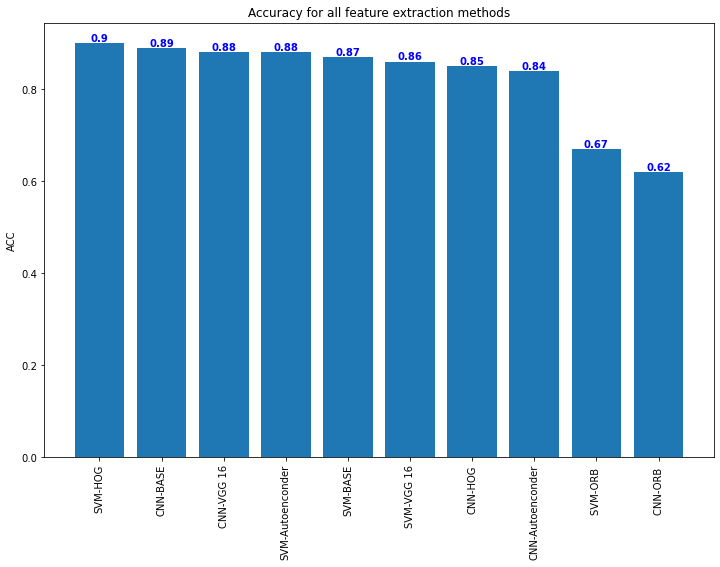

In [56]:
x = np.arange(len(genders_balanced['Model']))
y = genders_balanced['ACC']
models = genders_balanced['Model']
feature_extractors = genders_balanced['Feature Extract']

fig, ax = plt.subplots(figsize=(12,8))
ax.bar(x, y)
ax.set_xticks(x)
ax.set_xticklabels([f"{m}-{f}" for m, f in zip(models, feature_extractors)], rotation='vertical')
ax.set_ylabel('ACC')
ax.set_title('Accuracy for all feature extraction methods')

# Displaying the values on top of the bars
for i, v in enumerate(y):
    ax.text(i, v, str(v), color='black', fontweight='bold', ha='center', va='bottom')

plt.show()

## Age Classes

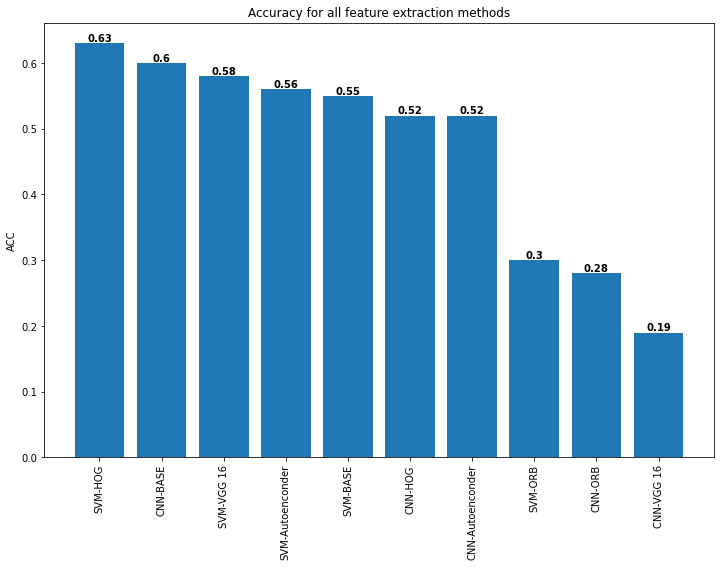

In [59]:
x = np.arange(len(age_classes_balanced['Model']))
y = age_classes_balanced['ACC']
models = age_classes_balanced['Model']
feature_extractors = age_classes_balanced['Feature Extract']

fig, ax = plt.subplots(figsize=(12,8))
ax.bar(x, y)
ax.set_xticks(x)
ax.set_xticklabels([f"{m}-{f}" for m, f in zip(models, feature_extractors)], rotation='vertical')
ax.set_ylabel('ACC')
ax.set_title('Accuracy for all feature extraction methods')

# Displaying the values on top of the bars
for i, v in enumerate(y):
    ax.text(i, v, str(v), color='black', fontweight='bold', ha='center', va='bottom')

plt.show()